In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings 
import plotly
import plotly.express as px
import graphviz
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("hrv_all.csv")
data

,participant,session,hrv,average_bpm,time,date,stress_self,anxiety_self,abnormal
0,A01,pre,64.0,75,14:19,2022/3/1,0.0,0.0,n
1,A01,cpt,75.0,74,14:22,2022/3/1,5.0,5.0,n
2,A01,break,63.0,78,14:26,2022/3/1,5.0,5.0,n
3,A01,math,62.0,78,14:29,2022/3/1,1.0,0.0,n
4,A01,post,59.0,75,14:34,2022/3/1,NaN,NaN,n
...,...,...,...,...,...,...,...,...,...
155,C11,pre,72.0,71,20:23,2022/3/26,0.0,0.0,n
156,C11,cpt,131.0,72,20:26,2022/3/26,9.0,10.0,n
157,C11,break,99.0,65,20:30,2022/3/26,5.0,5.0,n
158,C11,math,136.0,70,20:34,2022/3/26,9.0,9.0,n


In [267]:
data_pre=data[data.session=="pre"]
data_cpt=data[data.session=="cpt"]
data_break=data[data.session=="break"]
data_math=data[data.session=="math"]
data_post=data[data.session=="post"]

---

### KNN-Anxiety

In [271]:
#Predict anxiety

df = data[['session', 'hrv', 'average_bpm','stress_self', 'anxiety_self']].dropna()
for x in df['anxiety_self'].index.values:
    value = df['anxiety_self'].loc[x] 
    if value < 3:
        df.at[x, 'anxiety_self']=0 
    if value >= 3 and value < 7:
        df.at[x, 'anxiety_self']=1 
    if value >= 7:
        df.at[x, 'anxiety_self']=2

In [272]:
df

,session,hrv,average_bpm,stress_self,anxiety_self
0,pre,64.0,75,0.0,0.0
1,cpt,75.0,74,5.0,1.0
2,break,63.0,78,5.0,1.0
3,math,62.0,78,1.0,0.0
5,pre,46.0,104,0.0,0.0
...,...,...,...,...,...
153,math,41.0,74,2.0,0.0
155,pre,72.0,71,0.0,0.0
156,cpt,131.0,72,9.0,2.0
157,break,99.0,65,5.0,1.0


In [273]:
#不进行PCA，只用biomarker-anxiety

y = df['anxiety_self'].astype(int)
X = df[['hrv', 'average_bpm']]

In [274]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier 
result = []
result2 = []
t = []
for n_neighbors in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors) 
    neigh.fit(xTrain, yTrain)
    test = neigh.score(xTest,yTest)
    train = neigh.score(xTrain, yTrain) 
    result.append(test)
    result2.append(train)
    t.append(n_neighbors)
print(max(result),t[result.index(max(result))])

0.68 5


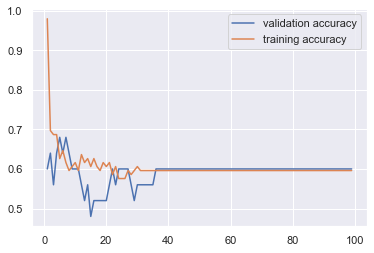

In [275]:
plt.plot(t, result,label = "validation accuracy") 
plt.plot(t, result2, label = "training accuracy") 
plt.legend()
plt.show()

In [276]:
idx=np.random.choice(np.arange(len(xTrain)),50,replace=False) 
x_sample=np.array(xTrain.iloc[idx]) 
y_sample=np.array(yTrain.iloc[idx])

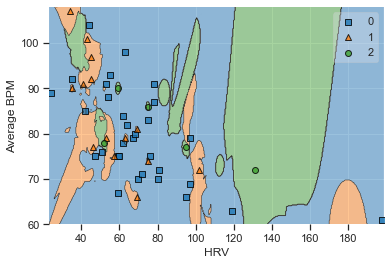

In [277]:
clf = KNeighborsClassifier(n_neighbors=t[result.index(max(result))], weights='distance')
clf.fit(xTrain, yTrain)
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(x_sample,y_sample,clf=clf)
plt.xlabel('HRV')
plt.ylabel('Average BPM')
plt.show()

---

In [278]:
#进行一个PCA看看

y = df['anxiety_self'].astype(int)
x = df[['hrv', 'average_bpm','stress_self']]

#from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.367665,5.002794
1,9.500853,2.925703
2,-3.115337,2.026306
3,-4.054876,2.532393
4,-25.981229,-18.582117
...,...,...
119,-23.419589,11.528274
120,7.372942,6.891425
121,64.224383,-9.248798
122,34.980593,5.691272


In [279]:
x = principalDf[['principal component 1','principal component 2']]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier 
result = []
result2 = []
t = []
for n_neighbors in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors) 
    neigh.fit(xTrain, yTrain)
    test = neigh.score(xTest,yTest)
    train = neigh.score(xTrain, yTrain) 
    result.append(test)
    result2.append(train)
    t.append(n_neighbors)
print(max(result),t[result.index(max(result))])

0.72 1


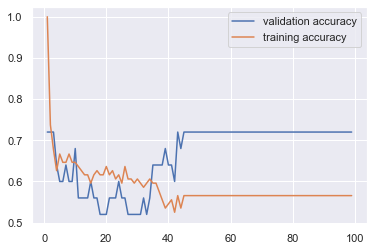

In [280]:
plt.plot(t, result,label = "validation accuracy") 
plt.plot(t, result2, label = "training accuracy") 
plt.legend()
plt.show()

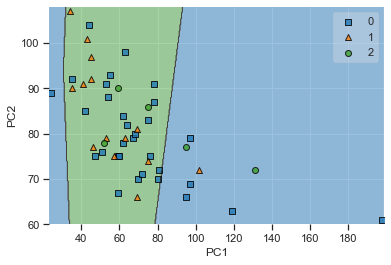

In [281]:
clf = KNeighborsClassifier(n_neighbors=t[result.index(max(result))], weights='distance')
clf.fit(xTrain, yTrain)
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(x_sample,y_sample,clf=clf)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

---

### KNN-Stress

In [282]:
df = data[['session', 'hrv', 'average_bpm','stress_self', 'anxiety_self']].dropna()
for x in df['stress_self'].index.values:
    value = df['stress_self'].loc[x] 
    if value < 3:
        df.at[x, 'stress_self']=0 
    if value >= 3 and value < 7:
        df.at[x, 'stress_self']=1 
    if value >= 7:
        df.at[x, 'stress_self']=2

In [283]:
y = df['stress_self'].astype(int)
X = df[['hrv', 'average_bpm']]

In [285]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier 
result = []
result2 = []
t = []
for n_neighbors in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors) 
    neigh.fit(xTrain, yTrain)
    test = neigh.score(xTest,yTest)
    train = neigh.score(xTrain, yTrain) 
    result.append(test)
    result2.append(train)
    t.append(n_neighbors)
print(max(result),t[result.index(max(result))])

0.76 16


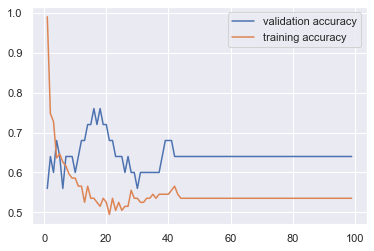

In [286]:
plt.plot(t, result,label = "validation accuracy") 
plt.plot(t, result2, label = "training accuracy") 
plt.legend()
plt.show()

In [287]:
idx=np.random.choice(np.arange(len(xTrain)),50,replace=False) 
x_sample=np.array(xTrain.iloc[idx]) 
y_sample=np.array(yTrain.iloc[idx])

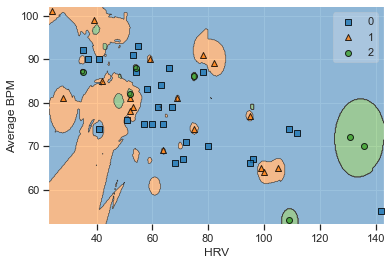

In [288]:
clf = KNeighborsClassifier(n_neighbors=t[result.index(max(result))], weights='distance')
clf.fit(xTrain, yTrain)
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(x_sample,y_sample,clf=clf)
plt.xlabel('HRV')
plt.ylabel('Average BPM')
plt.show()

---

### Decision Tree

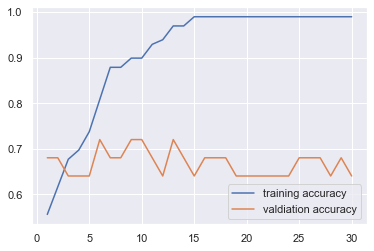

30 0.64


In [289]:
from sklearn import tree 
result_1 = [0 for i in range(30)] 
t1 = [0 for i in range(30)] 
maxi1 = 0
a1 = 0
for max_depth in range(1,31,1):
    clf = tree.DecisionTreeClassifier(max_depth = max_depth) 
    clf = clf.fit(xTrain, yTrain)
    result_1[max_depth-1] = clf.score(xTest,yTest) 
    t1[max_depth-1] = clf.score(xTrain,yTrain)
if result_1[max_depth-1] > maxi1: 
    a1 = max_depth
    maxi1 = result_1[max_depth-1]
plt.plot([i for i in range(1,31,1)], t1, label = "training accuracy") 
plt.plot([i for i in range(1,31,1)], result_1, label = "valdiation accuracy") 
plt.legend()
plt.show()
print(a1, maxi1)

In [290]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = a1) 
clf = clf.fit(xTrain, yTrain)

In [291]:
xTrain.columns

Index(['hrv', 'average_bpm'], dtype='object')

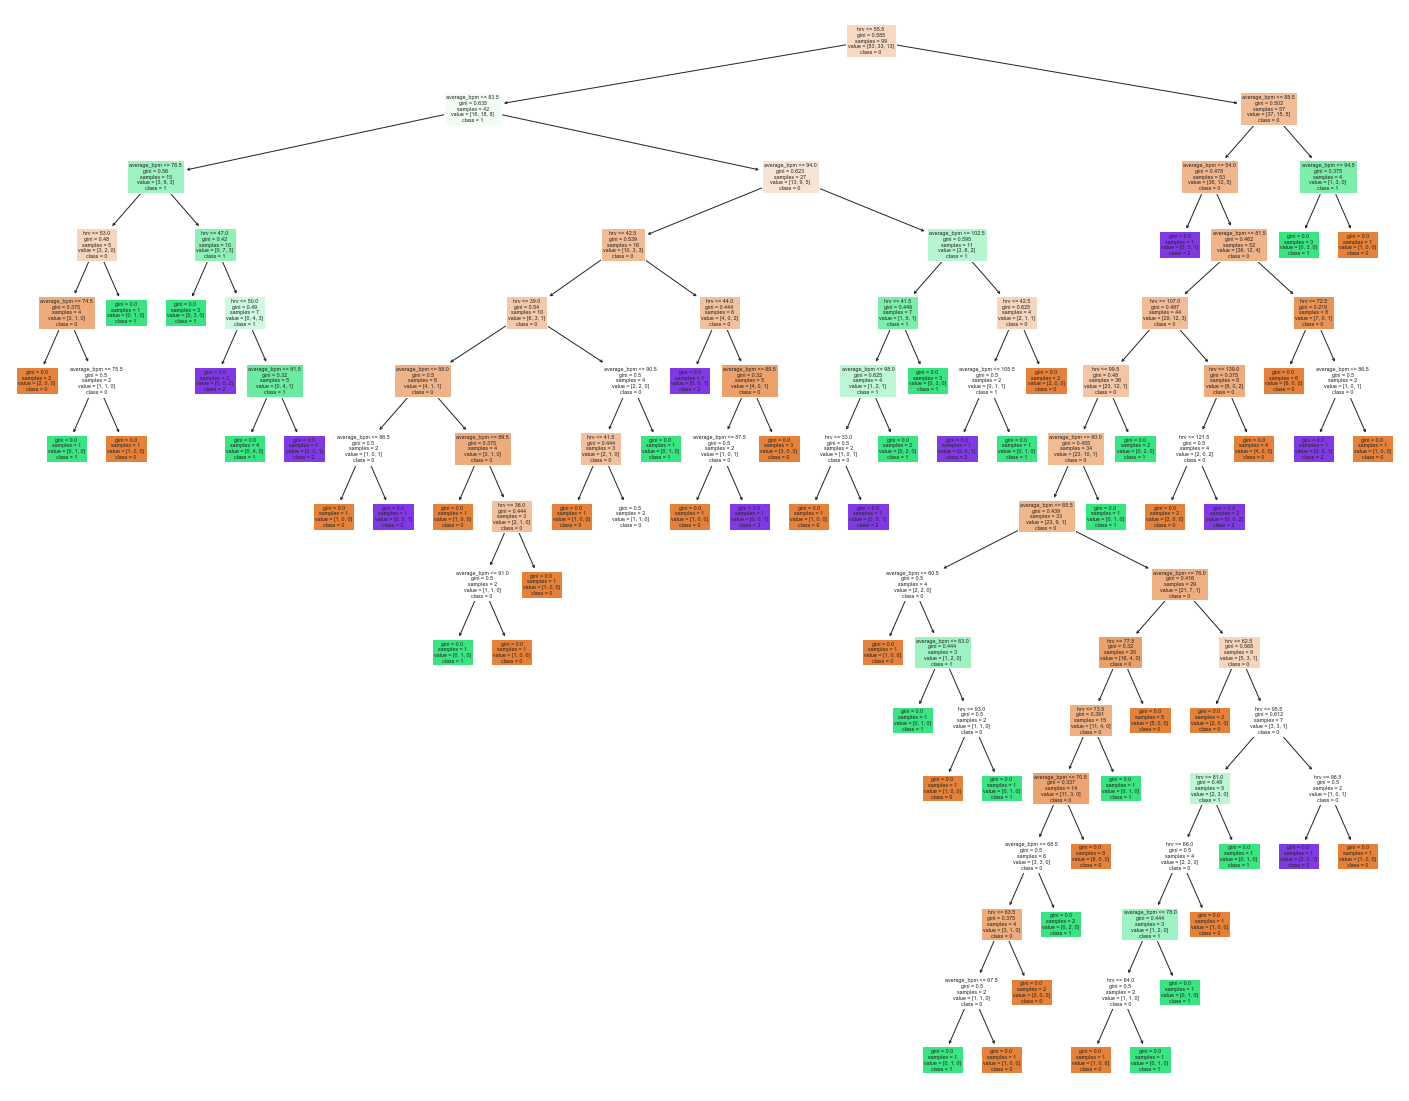

In [292]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=xTrain.columns, class_names=['0','1','2'],filled=True)